### Setting Up Necessary Things

In [1]:
%reload_ext autoreload
%autoreload 2
%matplotlib inline
bs = 8 # batch size
version = 1

In [2]:
!pip install -Uqq fastai fastbook nbdev

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 719.8/719.8 kB 34.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 64.8/64.8 kB 7.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.2/7.2 MB 75.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 486.2/486.2 kB 34.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 29.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.7/58.7 kB 7.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 82.1/82.1 kB 10.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 110.5/110.5 kB 13.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 212.5/212.5 kB 8.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 134.3/134.3 kB 14.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 268.8/268.8 kB 15.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.8/7.8 MB 50.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
%cd /content/drive/My Drive/Colab Notebooks/A.R.M.O.R - Military Armament Models Recognizer

/content/drive/My Drive/Colab Notebooks/A.R.M.O.R - Military Armament Models Recognizer


In [5]:
from fastai import *
from fastbook import *
from fastai.vision.all import *

In [ ]:
#data labels:

vehicles = [
  "Humvee vehicle",
  "M113 vehicle",
  "MRAP vehicle ",
  "BTR-80 vehicle", 
  "LAV-25 vehicle",
  "BMP-2 vehicle" 
]
tanks = [
  "M1 Abrams tank",
  "T-72 tank",
  "Leopard 2 tank",
  "Type 99 tank"
]
artillery = [
  "M270 MLRS artillery", "smerch artillery", "BM-21 Grad artillery", #rockets
  "2S19 Msta artillery", "M109 howitzer artillery",
  "G6 Rhino artillery"
]
drones = [ #missile capable drones
  "MQ-9 Reaper UCAV drone",
  "RQ-4 Global Hawk UCAV drone",
  "CH-5 Rainbow UCAV drone",
  "Bayraktar TB2 UCAV drone",  #UCAV ends
  "Hermes 900 drone", 
  "Heron TP drone"
]

military_labels = vehicles + tanks + artillery + drones
print(len(military_labels))
print(military_labels)

data_path = "data"

22
['Humvee vehicle', 'M113 vehicle', 'MRAP vehicle ', 'BTR-80 vehicle', 'LAV-25 vehicle', 'BMP-2 vehicle', 'M1 Abrams tank', 'T-72 tank', 'Leopard 2 tank', 'Type 99 tank', 'M270 MLRS artillery', 'smerch artillery', 'BM-21 Grad artillery', '2S19 Msta artillery', 'M109 howitzer artillery', 'G6 Rhino artillery', 'MQ-9 Reaper UVAC drone', 'RQ-4 Global Hawk UVAC drone', 'CH-5 Rainbow UVAC drone', 'Bayraktar TB2 UVAC drone', 'Hermes 900 drone', 'Heron TP drone']


In [ ]:
# dataset creation. browser fetching:


if not os.path.exists(data_path):
  os.mkdir(data_path)

#url_count = 0
for armament in military_labels:

  dest = f"{data_path}/{armament}"
  if not os.path.exists(dest):
    os.mkdir(dest)

  print('in progress ',armament)

  try:
    armament_image_urls = search_images_ddg(armament, max_images=400) #max working: 400. 430 doesn't cover all labels. else error
    print(len(armament_image_urls),'\n')
    #url_count = url_count + len(armament_image_urls)
    download_images(dest, urls = armament_image_urls)

  except Exception as e:
    armament_image_urls = search_images_ddg(armament, max_images=240) #max working: 240
    print(len(armament_image_urls),'\n')
    #url_count = url_count + len(armament_image_urls)
    download_images(dest, urls = armament_image_urls)
    #print(e,'\n')
    continue

#url_count

In [ ]:
image_counts = get_image_files(data_path)
image_counts #from 6227 downed to 5337. to be upgraded later

(#5337) [Path('data/smerch artillery/e750616c-d5eb-433c-bfac-180a24f938ad.jpg'),Path('data/smerch artillery/5ba9b9ba-918f-4eb7-9112-2d5f57a23986.jpg'),Path('data/smerch artillery/f94d58df-e960-4b6a-9e4b-35af8c22862f.jpg'),Path('data/smerch artillery/f693c188-261e-4086-ba72-75b1ff2a3418.png'),Path('data/smerch artillery/3ce09d1e-1d70-4d32-900a-b170a0691d82.jpg'),Path('data/smerch artillery/15e7e8db-1d50-4d33-ada1-d2b59a037563.jpg'),Path('data/smerch artillery/4beed690-bd36-4e8d-8f5e-5cacd3ae82d8.jpg'),Path('data/smerch artillery/617c1c7a-5e47-4970-b65f-bd5a086ea979.jpg'),Path('data/smerch artillery/4f51dd9b-4386-46cd-bdb2-06a965313f26.jpg'),Path('data/smerch artillery/74097c2b-eee8-471d-bd00-05e215f6bd97.jpg')...]

In [ ]:
#time benchmark: takes ~6mins for 2k images
failed = verify_images(image_counts)
failed

In [ ]:
failed.map(Path.unlink)

(#3) [None,None,None]

In [ ]:
image_counts = get_image_files(data_path)
image_counts

# From Data to Data Loaders

In [8]:
dls = torch.load(f"ARMOR_dataloader_v3.pkl")
dls.train.vocab

['2S19 Msta artillery', 'BM-21 Grad artillery', 'BMP-2 vehicle', 'BTR-80 vehicle', 'Bayraktar TB2 UVAC drone', 'CH-5 Rainbow UVAC drone', 'G6 Rhino artillery', 'Hermes 900 drone', 'Heron TP drone', 'Humvee vehicle', 'LAV-25 vehicle', 'Leopard 2  tank', 'M1 Abrams tank', 'M109 artillery', 'M113 vehicle', 'M270 MLRS artillery', 'MQ-9 Reaper UVAC drone', 'MRAP vehicle', 'RQ-4 Global Hawk UVAC drone', 'T-72 tank', 'Type 99 tank', 'smerch artillery']

In [ ]:
dblock = DataBlock(
    blocks=(ImageBlock, CategoryBlock),
    get_items=get_image_files,                        # get_image_files returns a list of all images in that path recursively by default
    splitter=RandomSplitter(valid_pct=0.1, seed=42),  # getting 90-10 train-validation split
    get_y=parent_label,                               # taking the folder name as labels
    item_tfms=Resize(128))

In [ ]:
dls = dblock.dataloaders(data_path,bs=bs)

# Data Augmentation

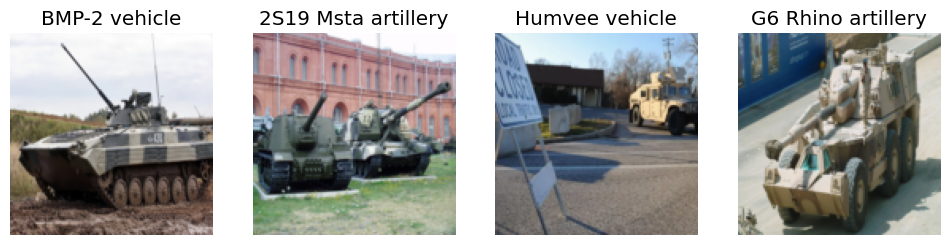

In [ ]:
dblock = dblock.new(item_tfms=Resize(128, ResizeMethod.Squish)) # Squishing the whole image into (128 x 128) size
dls = dblock.dataloaders(data_path)
dls.valid.show_batch(max_n=4, nrows=1)

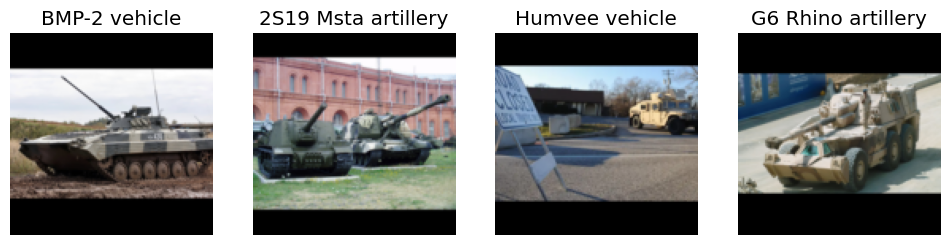

In [ ]:
dblock = dblock.new(item_tfms=Resize(128, ResizeMethod.Pad, pad_mode='zeros')) # Padding the extra spaced the whole image into (128 x 128) size without squishing
dls = dblock.dataloaders(data_path)
dls.valid.show_batch(max_n=4, nrows=1)

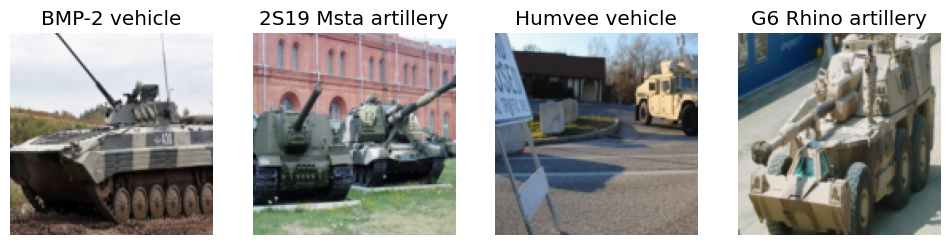

In [ ]:

dblock = dblock.new(item_tfms=RandomResizedCrop(128, min_scale=0.3)) # Randomly cropping, cutting, resizing, coloring parts of image into (128 x 128) size

dls = dblock.dataloaders(data_path) #apply on dataset
dls.valid.show_batch(max_n=4, nrows=1)

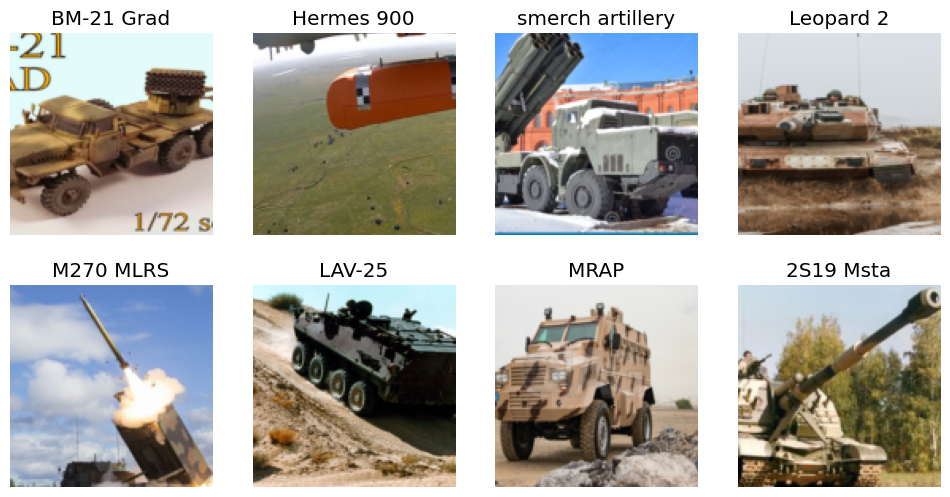

In [ ]:
dls.train.show_batch(max_n=8, nrows=2)

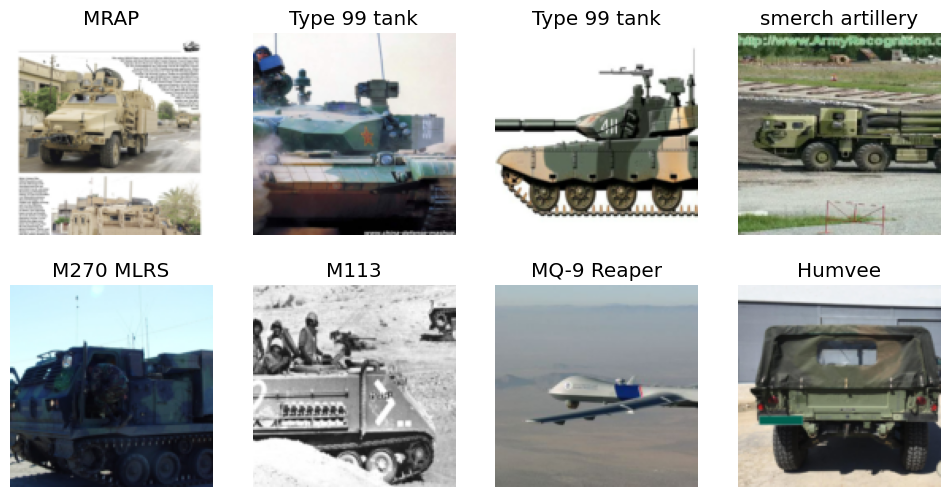

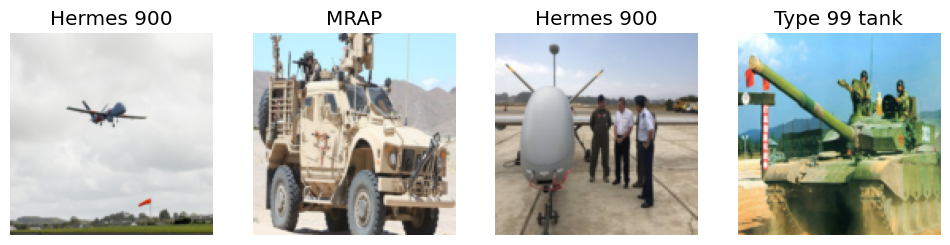

In [ ]:
dls.train.show_batch(max_n=8, nrows=2) 
dls.valid.show_batch(max_n=4, nrows=1)

In [ ]:
torch.save(dls, f"ARMOR_dataloader_v{version}.pkl")

In [ ]:
dls = torch.load(f"ARMOR_dataloader_v{version}.pkl")

# Training AND Cleaning:

In [ ]:
%reload_ext autoreload
%autoreload 2
%matplotlib inline
bs = 32 # batch size
version = 1

In [ ]:
model_path = "models"

In [ ]:
model = vision_learner(dls, resnet152, metrics=[error_rate,accuracy]) #152 instead of 34

/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet152_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet152_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)
Downloading: "https://download.pytorch.org/models/resnet152-394f9c45.pth" to /root/.cache/torch/hub/checkpoints/resnet152-394f9c45.pth
100%|██████████| 230M/230M [00:03<00:00, 66.0MB/s]


In [ ]:
model.load(f"ARMOR-classifier-v4") 
#model = load_learner('models/cap-recognizer-v2.pkl')

In [ ]:
#initial test run with benchmark time: 2:32AM to 2:40AM = 7min
model.fine_tune(1) 

epoch,train_loss,valid_loss,error_rate,accuracy,time
0,2.592902,1.505280,0.434343,0.565657,03:16


/usr/local/lib/python3.10/dist-packages/PIL/Image.py:975: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/PIL/Image.py:975: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


epoch,train_loss,valid_loss,error_rate,accuracy,time
0,1.413740,0.983006,0.294613,0.705387,03:13


/usr/local/lib/python3.10/dist-packages/PIL/Image.py:975: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/PIL/Image.py:975: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


In [ ]:
model.fine_tune(5) # for 20   

version = 4
model.save(f"ARMOR-classifier-v{version}") #Learner.save() Save model and optimizer state (if with_opt). I think useful if you will more retrain later

model.export(f"{model_path}/ARMOR-classifier-v{version}.pkl")
# Learner.export() Export the content of self without the items and the optimizer state for inference i think when all training is all complete. for MLOps deploy

epoch,train_loss,valid_loss,error_rate,accuracy,time
0,0.138149,0.028618,0.005629,0.994371,11:03


/usr/local/lib/python3.10/dist-packages/PIL/Image.py:975: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


epoch,train_loss,valid_loss,error_rate,accuracy,time
0,0.136158,0.088330,0.016886,0.983114,02:54
1,0.279743,0.268082,0.080675,0.919325,02:53
2,0.240779,0.148712,0.050657,0.949343,02:52
3,0.151863,0.118771,0.037523,0.962477,02:52
4,0.095365,0.098650,0.031895,0.968105,02:54


/usr/local/lib/python3.10/dist-packages/PIL/Image.py:975: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/PIL/Image.py:975: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/PIL/Image.py:975: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/PIL/Image.py:975: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/PIL/Image.py:975: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/PIL/Image.py:975: UserWarning: Palette images with Transparency expressed in bytes sh

In [ ]:
model.save(f"ARMOR-classifier-v{version}")

Path('models/ARMOR-recognizer-v2.pth')

### Cleaning:

In [ ]:
#model load
model.load(f"cap-recognizer-v{version}")

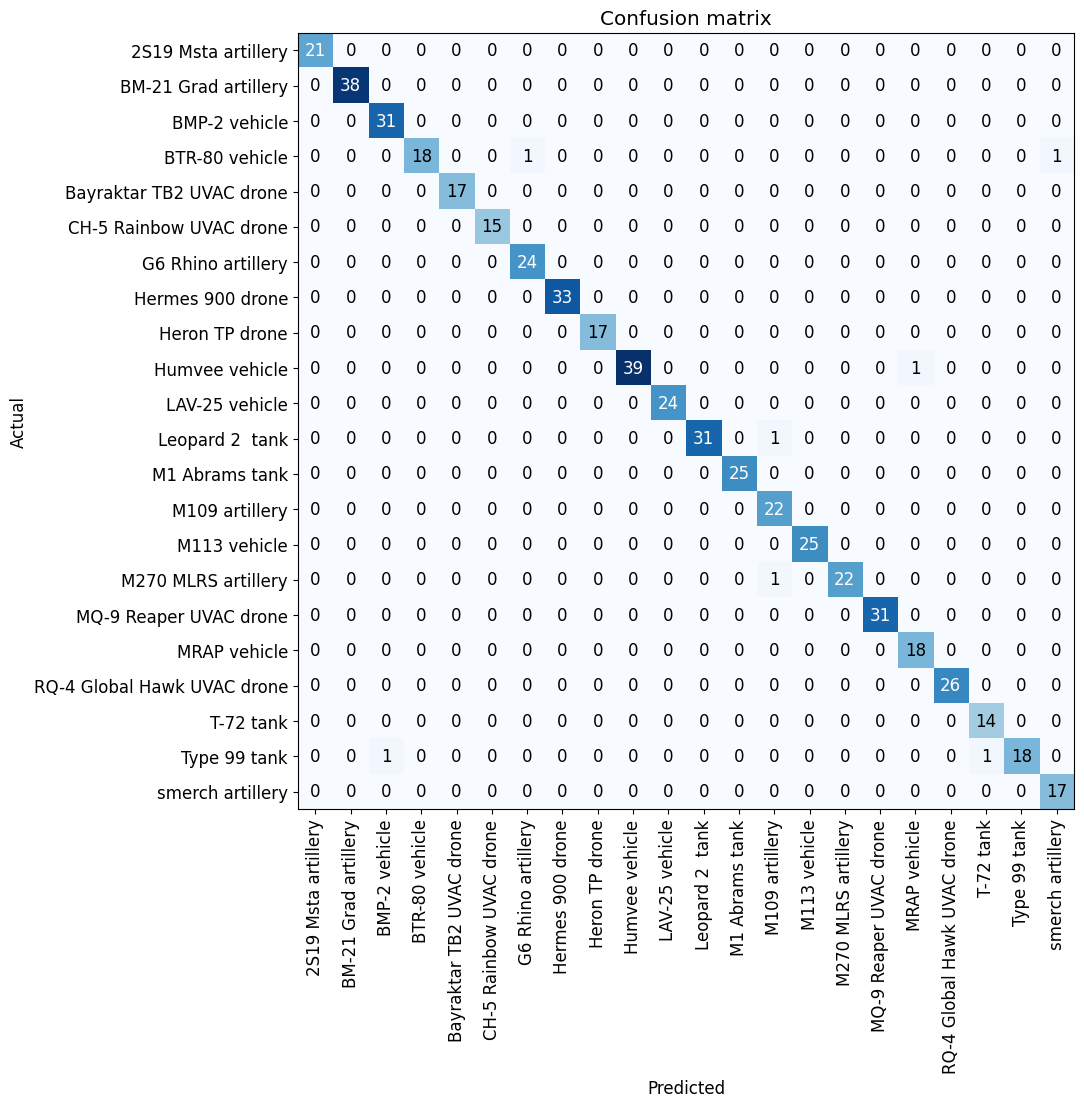

In [ ]:
interp = ClassificationInterpretation.from_learner(model)

interp.plot_confusion_matrix(figsize=(11, 11))
#time benchmark: 30s

In [ ]:
interp.plot_top_losses(20, nrows=5, figsize=(25, 25))

Output hidden; open in https://colab.research.google.com to view.

### Cleaner:

In [ ]:
cleaner = ImageClassifierCleaner(model)
cleaner 

In [ ]:
for idx in cleaner.delete(): cleaner.fns[idx].unlink()                                    # delete irrelevant data
for idx,cat in cleaner.change(): shutil.move(str(cleaner.fns[idx]), f"{data_path}/{cat}") # change the directory

## Export model (for inference)

In [ ]:
model.export(f"{model_path}/ARMOR-recognizer-v{version}.pkl")

# predict with model inference

In [ ]:
version = 2
img_path = 'test_images'
model_path = f'models/ARMOR-recognizer-v{version}.pkl'
model = load_learner(model_path)

In [ ]:
img = Image.open(f'{img_path}/unknown_00.jpg')
img.to_thumb(128,128)

In [ ]:
model.predict(f'{img_path}/unknown_00.jpg')